<a href="https://colab.research.google.com/github/mbelcuixart-hub/Disease-Prediction-Based-on-Symptoms/blob/main/Disease_Prediction_Based_on_Symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION


Accurate and timely diagnosis of diseases is crucial to provide proper medical care and improve patient health outcomes. However, traditional diagnostic processes can often be slow, costly, and subjective, leading to delays in treatment and suboptimal results.

Machine learning techniques offer an opportunity to support healthcare decision-making by analyzing large amounts of data and identifying patterns that may not be easily detectable by humans.

# OBJECTIVE

The objective of this project is to develop a machine learning model capable of predicting a disease based on the symptoms presented by an individual.

This model aims to:
- Support medical professionals by providing a fast and data-driven diagnostic tool.
- Enable patient self-assessment by offering an initial prediction based on reported symptoms.
- Optimize healthcare resource allocation by helping prioritize patients with higher risk conditions.

# TOOLS

Python, Pandas, Matplotlib, Numpy, Seaborn, (Google Colab)

# IMPORTING LIBRARIES

In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# DATASET DESCRIPTION

The dataset is provided in CSV format and contains medical records related to patient symptoms and diagnosed diseases.
Each row represents a patient, while each column corresponds to a specific symptom.
The target variable represents the diagnosed disease.

# DATA LOADING

In this section, the dataset is loaded from a CSV file.

# EDA - EXPLORATORY DATA ANALYSIS

Exploration of the data structure

In [397]:
df=pd.read_csv('/content//Testing.csv')

In [398]:
df.head ()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [400]:
df.dtypes

,0
itching,int64
skin_rash,int64
nodal_skin_eruptions,int64
continuous_sneezing,int64
shivering,int64
...,...
inflammatory_nails,int64
blister,int64
red_sore_around_nose,int64
yellow_crust_ooze,int64


In [401]:
df.shape

(42, 133)

**Interpretation of the data set**

The data set is arranged as follows:

*   Columns = symptoms
*   Rows = prognosis

Data type = boolean data
*   1 → symptom present
*   0 → symptom absent     







### DATA CLEANING

Search for null values

In [402]:
df.head()
df.dtypes
df.isnull().sum().sum()

np.int64(0)

No missing values were detected in the dataset.

NaN detection

In [403]:

print(df[sintomas_cols].isnull().sum())

print(df[sintomas_cols].isnull().sum().sum())

print(df[sintomas_cols].isnull().any(axis=1))


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
0
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
dtype: bool


Checking for duplicate rows or duplicate columns

In [404]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [405]:
print(df['prognosis'].value_counts())


prognosis
Fungal infection                           2
Allergy                                    1
GERD                                       1
Chronic cholestasis                        1
Drug Reaction                              1
Peptic ulcer diseae                        1
AIDS                                       1
Diabetes                                   1
Gastroenteritis                            1
Bronchial Asthma                           1
Hypertension                               1
Migraine                                   1
Cervical spondylosis                       1
Paralysis (brain hemorrhage)               1
Jaundice                                   1
Malaria                                    1
Chicken pox                                1
Dengue                                     1
Typhoid                                    1
hepatitis A                                1
Hepatitis B                                1
Hepatitis C                                1


In [406]:
df[df['prognosis'].duplicated(keep=False)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
41,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,Fungal infection


I detected that a duplicate record was made with the same prognosis "Fungal_infection" but with different symptoms. I will choose to delete one of them as it complicates future predictions, opting to keep the prognosis with the greater appearance of symptoms.

In [407]:
sintomas_cols = df.columns[:-1]
df['total_sintomas'] = df[sintomas_cols].sum(axis=1)

print(df.loc[[0, 41], ['total_sintomas'] + list(sintomas_cols)])

    total_sintomas  itching  skin_rash  nodal_skin_eruptions  \
0                4        1          1                     1   
41               6        1          1                     0   

    continuous_sneezing  shivering  chills  joint_pain  stomach_pain  acidity  \
0                     0          0       0           0             0        0   
41                    0          0       0           0             0        0   

    ...  pus_filled_pimples  blackheads  scurring  skin_peeling  \
0   ...                   0           0         0             0   
41  ...                   0           0         0             1   

    silver_like_dusting  small_dents_in_nails  inflammatory_nails  blister  \
0                     0                     0                   0        0   
41                    0                     0                   0        0   

    red_sore_around_nose  yellow_crust_ooze  
0                      0                  0  
41                     1          

In [408]:
df = df.drop([0])

In [409]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,total_sintomas
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Allergy,4
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,GERD,6
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Chronic cholestasis,7
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,Drug Reaction,5
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Peptic ulcer diseae,6


In [410]:
sintomas_cols = df.columns[:-1]

duplicados = sintomas_cols[sintomas_cols.duplicated()]

print("Síntomas duplicados en los encabezados:")
print(duplicados)


Síntomas duplicados en los encabezados:
Index([], dtype='object')


In [411]:
from collections import Counter

conteo = Counter(sintomas_cols)
repetidos = {k:v for k,v in conteo.items() if v > 1}

print("Síntomas repetidos y cuántas veces aparecen:")
print(repetidos)


Síntomas repetidos y cuántas veces aparecen:
{}


Total symptoms by prognosis

In [412]:
df['total_sintomas'] = X.sum(axis=1)


In [413]:
X_freq = X.div(X.sum(axis=1), axis=0)

# DATA VISUALIZATION

**Heatmap**
* Each row = one prognosis
* Each column = one symptom

Darker color → most frequent symptom in that prognosis



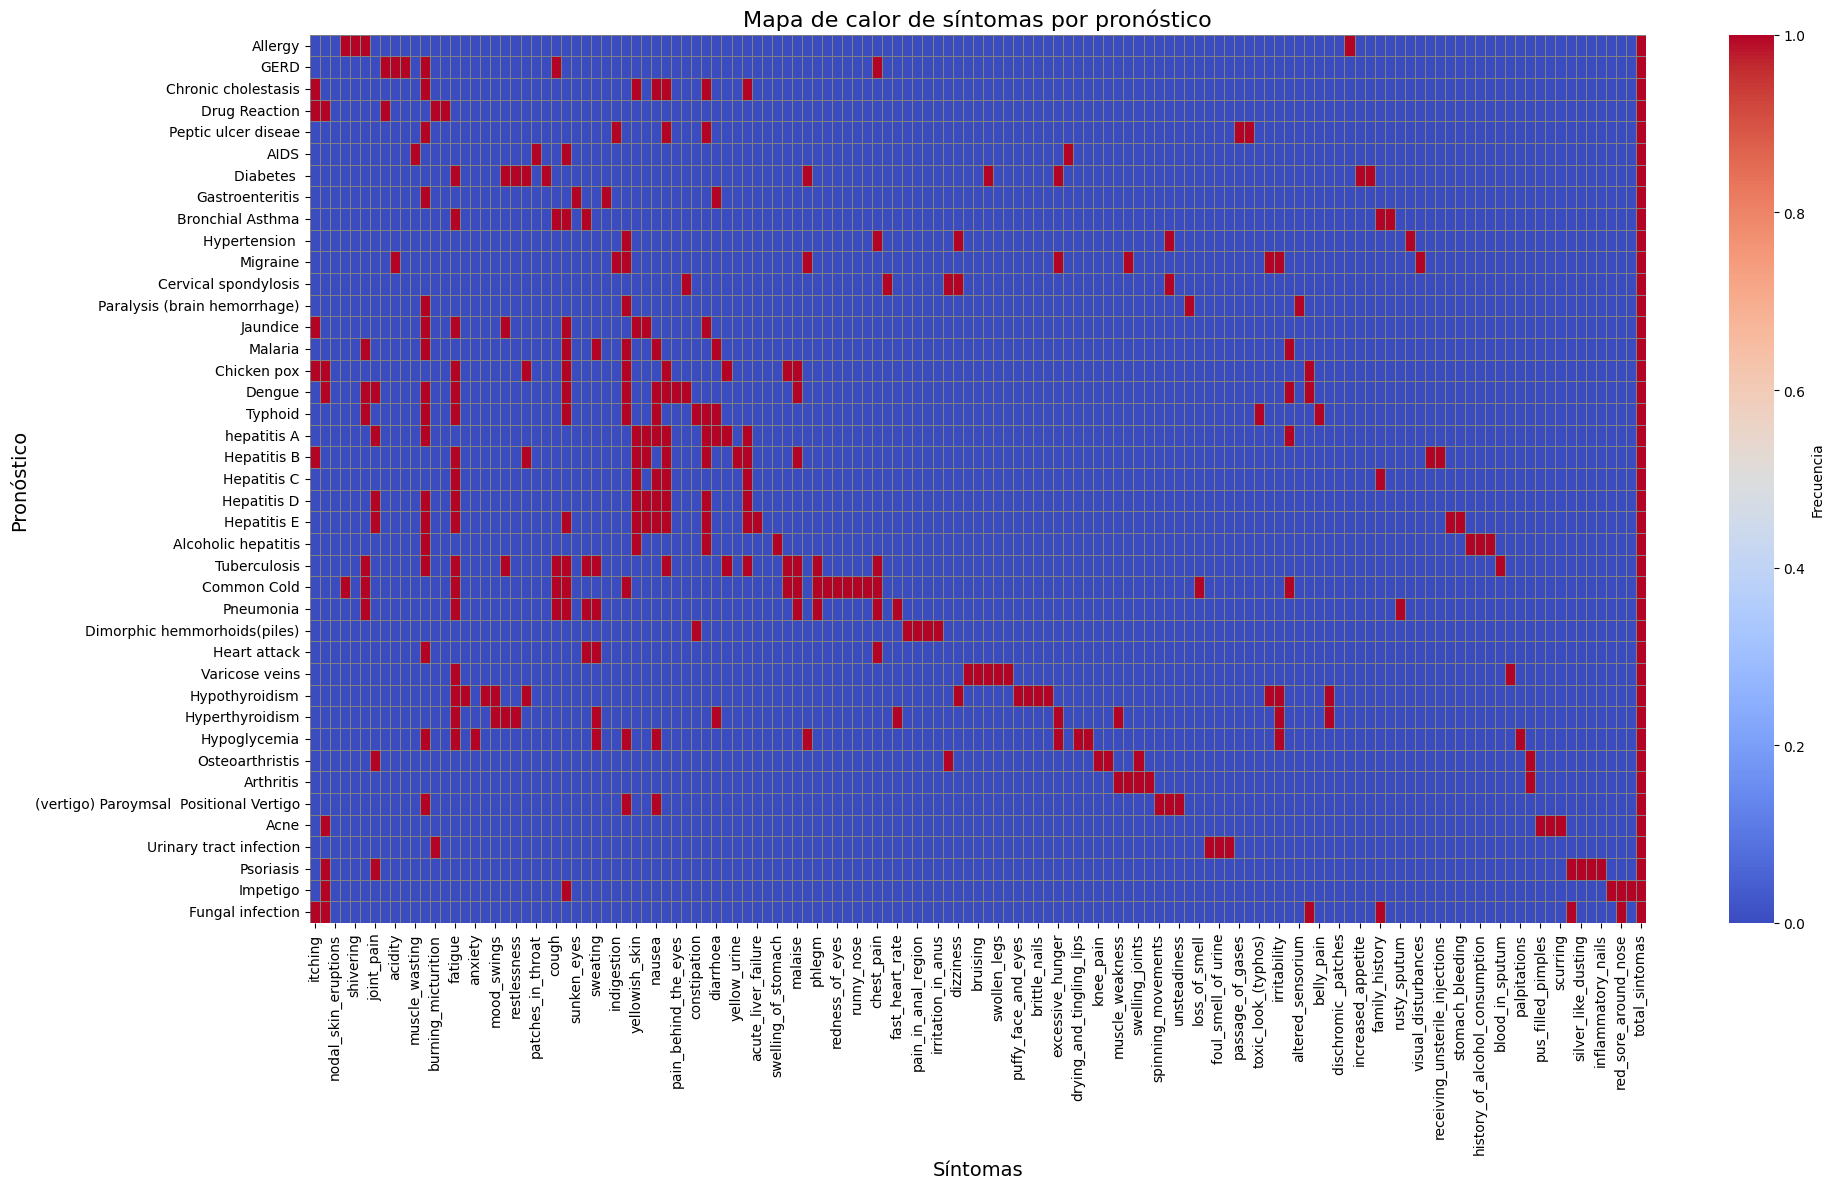

In [428]:
X_freq_named = X.copy()
X_freq_named['prognosis'] = df['prognosis']
X_freq_named = X_freq_named.set_index('prognosis')

plt.figure(figsize=(20,12))
sns.heatmap(
    X_freq_named,
    cmap="coolwarm",
    cbar_kws={'label': 'Frecuencia'},
    linewidths=0.5,
    linecolor='gray',
    vmin=0, vmax=1,
    square=False
)


plt.xlabel("Síntomas", fontsize=14)
plt.ylabel("Pronóstico", fontsize=14)
plt.title("Mapa de calor de síntomas por pronóstico", fontsize=16)

plt.tight_layout()
plt.show()


# MODEL TRAINING

**Model objective: to predict prognosis using the symptom variable**

**Classification: supervised learning, Cosine similarity**

Data preparation

Variables: features (X) y labels (y)

In [416]:
X = df.drop('prognosis', axis=1).astype(int)
y = df['prognosis']

Application of the model

In [423]:
from sklearn.metrics.pairwise import cosine_similarity


def predict_prognosis(symptom_dict, X, y, top_k=3):

    input_df = pd.DataFrame([symptom_dict])

    input_df = input_df[X.columns]

    similarities = cosine_similarity(X, input_df)

    top_idx = np.argsort(similarities.flatten())[::-1][:top_k]

    results = pd.DataFrame({
        'Prognosis': y.iloc[top_idx].values,
        'Similarity': similarities[top_idx].flatten()
    })

    return results


Adjustment to only enter existing symptoms in the new patient

In [424]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

def predict_prognosis(symptom_dict, X, y, top_k=3):

    input_df = pd.DataFrame([symptom_dict])

    input_df = input_df.reindex(columns=X.columns, fill_value=0)

    similarities = cosine_similarity(X, input_df)

    top_idx = np.argsort(similarities.flatten())[::-1][:top_k]

    return pd.DataFrame({
        'Prognosis': y.iloc[top_idx].values,
        'Similarity': similarities[top_idx].flatten()
    })



# EVALUATION

Template generation

In [425]:

symptoms = X.columns.tolist()

template = {symptom: 0 for symptom in symptoms}

template


{'itching': 0,
 'skin_rash': 0,
 'nodal_skin_eruptions': 0,
 'continuous_sneezing': 0,
 'shivering': 0,
 'chills': 0,
 'joint_pain': 0,
 'stomach_pain': 0,
 'acidity': 0,
 'ulcers_on_tongue': 0,
 'muscle_wasting': 0,
 'vomiting': 0,
 'burning_micturition': 0,
 'spotting_ urination': 0,
 'fatigue': 0,
 'weight_gain': 0,
 'anxiety': 0,
 'cold_hands_and_feets': 0,
 'mood_swings': 0,
 'weight_loss': 0,
 'restlessness': 0,
 'lethargy': 0,
 'patches_in_throat': 0,
 'irregular_sugar_level': 0,
 'cough': 0,
 'high_fever': 0,
 'sunken_eyes': 0,
 'breathlessness': 0,
 'sweating': 0,
 'dehydration': 0,
 'indigestion': 0,
 'headache': 0,
 'yellowish_skin': 0,
 'dark_urine': 0,
 'nausea': 0,
 'loss_of_appetite': 0,
 'pain_behind_the_eyes': 0,
 'back_pain': 0,
 'constipation': 0,
 'abdominal_pain': 0,
 'diarrhoea': 0,
 'mild_fever': 0,
 'yellow_urine': 0,
 'yellowing_of_eyes': 0,
 'acute_liver_failure': 0,
 'fluid_overload': 0,
 'swelling_of_stomach': 0,
 'swelled_lymph_nodes': 0,
 'malaise': 0,
 'b

Test with patient

In [420]:
nuevo_paciente = {'continuous_sneezing': 1,
 'shivering': 1,
 'chills': 1}
resultado = predict_prognosis(nuevo_paciente, X, y, top_k=5)
resultado

,Prognosis,Similarity
0,Allergy,0.142374
1,Malaria,0.023891
2,Common Cold,0.022568
3,Pneumonia,0.017408
4,Typhoid,0.017408


The system retrieves the top-k most similar prognoses based on symptom overlap. Similarity scores indicate how closely the input symptoms match each disease prototype.

# CONCLUSIONS

A prediction model based on symptom similarity was developed to identify the most likely diagnosis from a patient’s set of symptoms. The model uses the symptom matrix as a reference and calculates cosine similarity with each row of the dataset to return the closest diagnoses.

The generated heatmaps allow visualization of the characteristic symptom patterns for each prognosis, highlighting the most relevant and frequent markers. This facilitates clinical interpretation and the identification of key symptoms for each disease.

This approach is especially useful for small datasets or those with unique diagnoses per row, where traditional supervised methods would not be applicable. The practical application of the model allows entering a patient’s symptoms and quickly obtaining a ranking of possible diagnoses, which can serve as a support tool for clinical or educational decision-making.

Although the model is simple and transparent, its limitations include dependence on the symptoms present in the dataset and inability to generalize to unseen symptom combinations. Nonetheless, it provides a fast, interpretable, and reproducible solution for predicting prognosis from binary symptoms.